In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv('happiness_report.csv')

In [9]:
pd.set_option('display.max_rows',None)

In [10]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [11]:
df.shape

(158, 12)

Contain 158 rows with 12 column

In [12]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

Contain country,region,happiness rank,happiness score,standard error,economy,family,health,freedom,trust,generosity and dystopia residual

In [13]:
df.dtypes

Country               object
Region                object
Happiness Rank         int64
Happiness Score      float64
Standard Error       float64
Economy              float64
Family               float64
Health               float64
Freedom              float64
Trust                float64
Generosity           float64
Dystopia Residual    float64
dtype: object

Contain conuntry and region are object columns, happiness rank is integer and happiness score,standard error,economy,family,health,freedom,trust,generosity and dystopia residual are float column.

In [14]:
df.keys()

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

Keys of dataset

In [15]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


First five rows of the dataset

In [16]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


Last five column of dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country              158 non-null object
Region               158 non-null object
Happiness Rank       158 non-null int64
Happiness Score      158 non-null float64
Standard Error       158 non-null float64
Economy              158 non-null float64
Family               158 non-null float64
Health               158 non-null float64
Freedom              158 non-null float64
Trust                158 non-null float64
Generosity           158 non-null float64
Dystopia Residual    158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


It is a non null value dataset.

In [18]:
df.isnull()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
df.isnull().sum()

Country              0
Region               0
Happiness Rank       0
Happiness Score      0
Standard Error       0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia Residual    0
dtype: int64

In [20]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Description of the dataset

In [21]:
df.shape

(158, 12)

Contain 158 rows with 12 column

In [22]:
df['Happiness Score'].value_counts()

5.192    2
4.642    1
5.098    1
5.129    1
5.889    1
6.937    1
4.694    1
3.681    1
4.350    1
6.611    1
3.006    1
4.949    1
3.575    1
5.975    1
5.960    1
6.574    1
4.677    1
4.874    1
7.561    1
4.077    1
4.839    1
6.983    1
4.681    1
5.194    1
6.168    1
6.505    1
4.419    1
5.759    1
5.332    1
6.003    1
5.754    1
6.798    1
5.689    1
6.298    1
6.411    1
3.655    1
5.548    1
5.212    1
4.715    1
6.329    1
3.340    1
3.781    1
5.848    1
4.512    1
4.297    1
5.878    1
3.995    1
4.885    1
3.667    1
5.360    1
5.102    1
3.587    1
4.686    1
5.995    1
6.853    1
7.522    1
6.786    1
4.786    1
7.527    1
6.485    1
3.678    1
4.565    1
6.269    1
6.810    1
4.194    1
6.946    1
5.429    1
7.226    1
5.399    1
6.123    1
5.890    1
4.876    1
5.007    1
5.855    1
3.956    1
5.770    1
5.605    1
4.518    1
4.788    1
6.940    1
5.987    1
5.824    1
5.716    1
5.833    1
4.739    1
3.465    1
2.905    1
4.971    1
6.295    1
4.959    1
6.302    1

Happiness score value counts

In [23]:
df.apply(lambda x:sum(x.isnull()),axis=0)

Country              0
Region               0
Happiness Rank       0
Happiness Score      0
Standard Error       0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia Residual    0
dtype: int64

In [24]:
df['Happiness Score'].nunique()

157

Number of unique value of happiness score column

In [25]:
df['Happiness Score'].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

Unique value of happiness score column

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Country']=le.fit_transform(df['Country'])
df['Region']=le.fit_transform(df['Region'])

Label encoder to change the categorical data column to numnerical data column

In [27]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


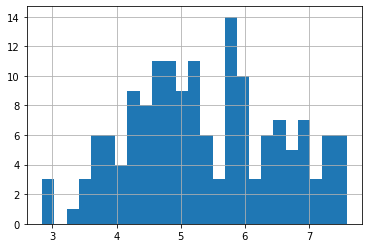

In [28]:
df['Happiness Score'].hist(bins=25)

Histogram of Happiness score column and its is little bit skewed

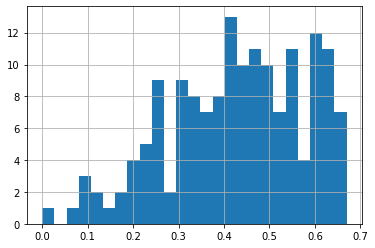

In [29]:
df['Freedom'].hist(bins=25)

Histogram of Fredom column and its skewed toward right

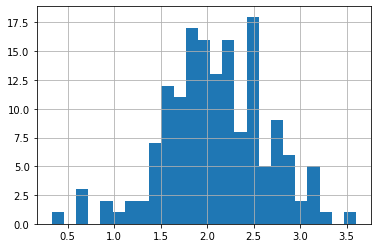

In [30]:
df['Dystopia Residual'].hist(bins=25)

Histomgram of Dystopia residual column normally skewed

<function matplotlib.pyplot.show(*args, **kw)>

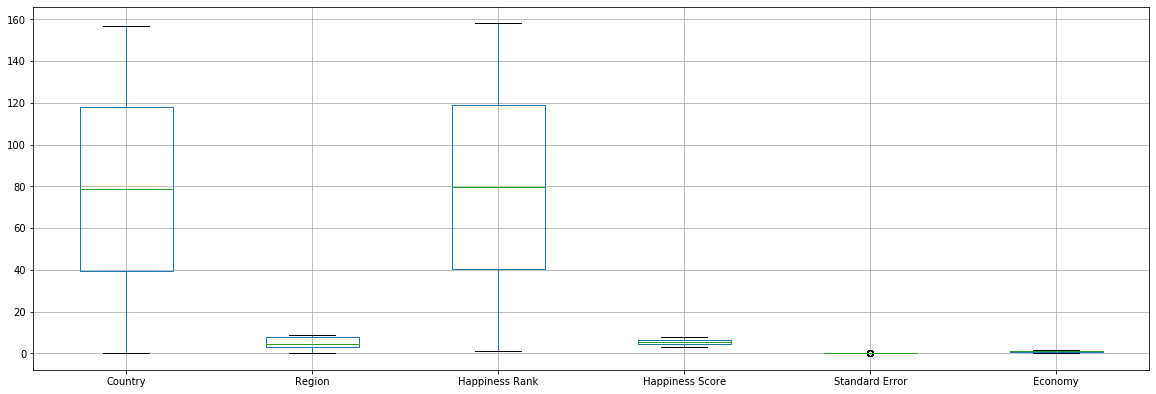

In [31]:
df.iloc[:,:6].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show

Boxplot of first 7 column of given dataset

<function matplotlib.pyplot.show(*args, **kw)>

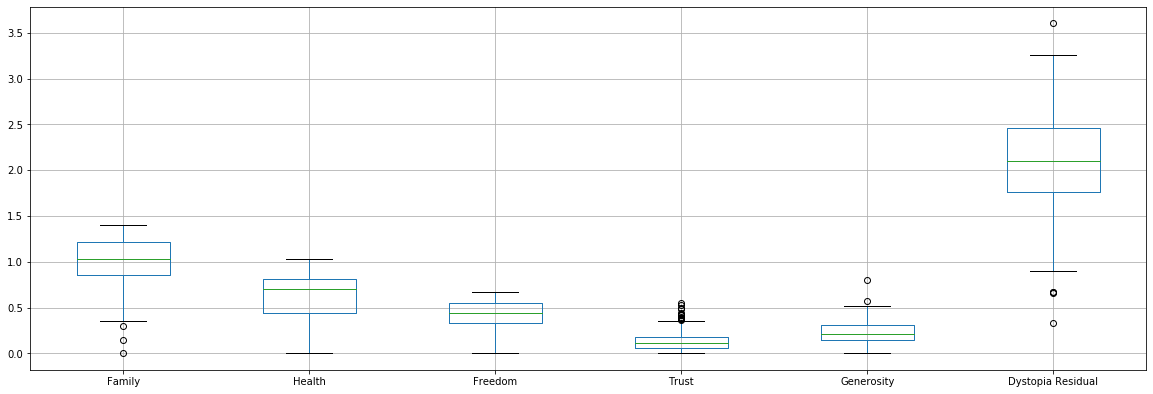

In [32]:
df.iloc[:,6:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show

Boxplot of remaining column of given dataset

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


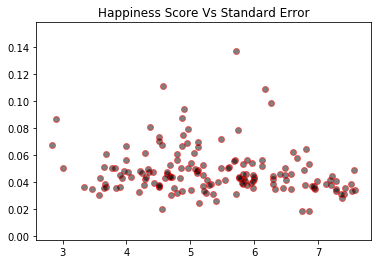

In [33]:
plt.scatter(df['Happiness Score'],df['Standard Error'],alpha=0.5,c=(0,0,0),edgecolors='r')
plt.title('Happiness Score Vs Standard Error')
plt.show()

Scatter plot of happiness score and standard error

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


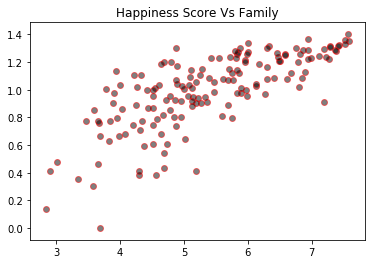

In [34]:
plt.scatter(df['Happiness Score'],df['Family'],alpha=0.5,c=(0,0,0),edgecolors='r')
plt.title('Happiness Score Vs Family')
plt.show()

Scatter plot of happiness score and family

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


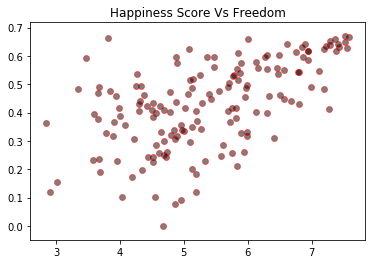

In [35]:
plt.scatter(df['Happiness Score'],df['Freedom'],alpha=0.5,c=(0,0,0),edgecolors='r')
plt.title('Happiness Score Vs Freedom')
plt.show()

Scatter plot of happiness score and freedom

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


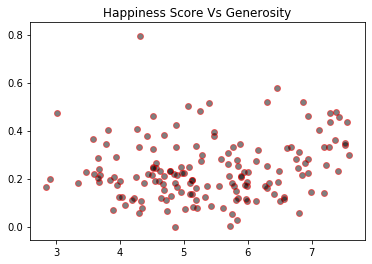

In [36]:
plt.scatter(df['Happiness Score'],df['Generosity'],alpha=0.5,c=(0,0,0),edgecolors='r')
plt.title('Happiness Score Vs Generosity')
plt.show()

Scatter plot of happiness score and generosity

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


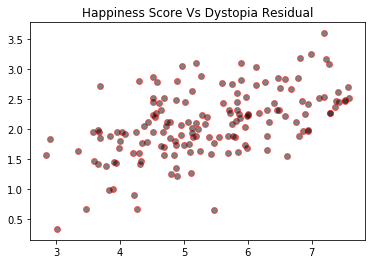

In [37]:
plt.scatter(df['Happiness Score'],df['Dystopia Residual'],alpha=0.5,c=(0,0,0),edgecolors='r')
plt.title('Happiness Score Vs Dystopia Residual')
plt.show() 

Scatter plot of happiness score and dystopia residual

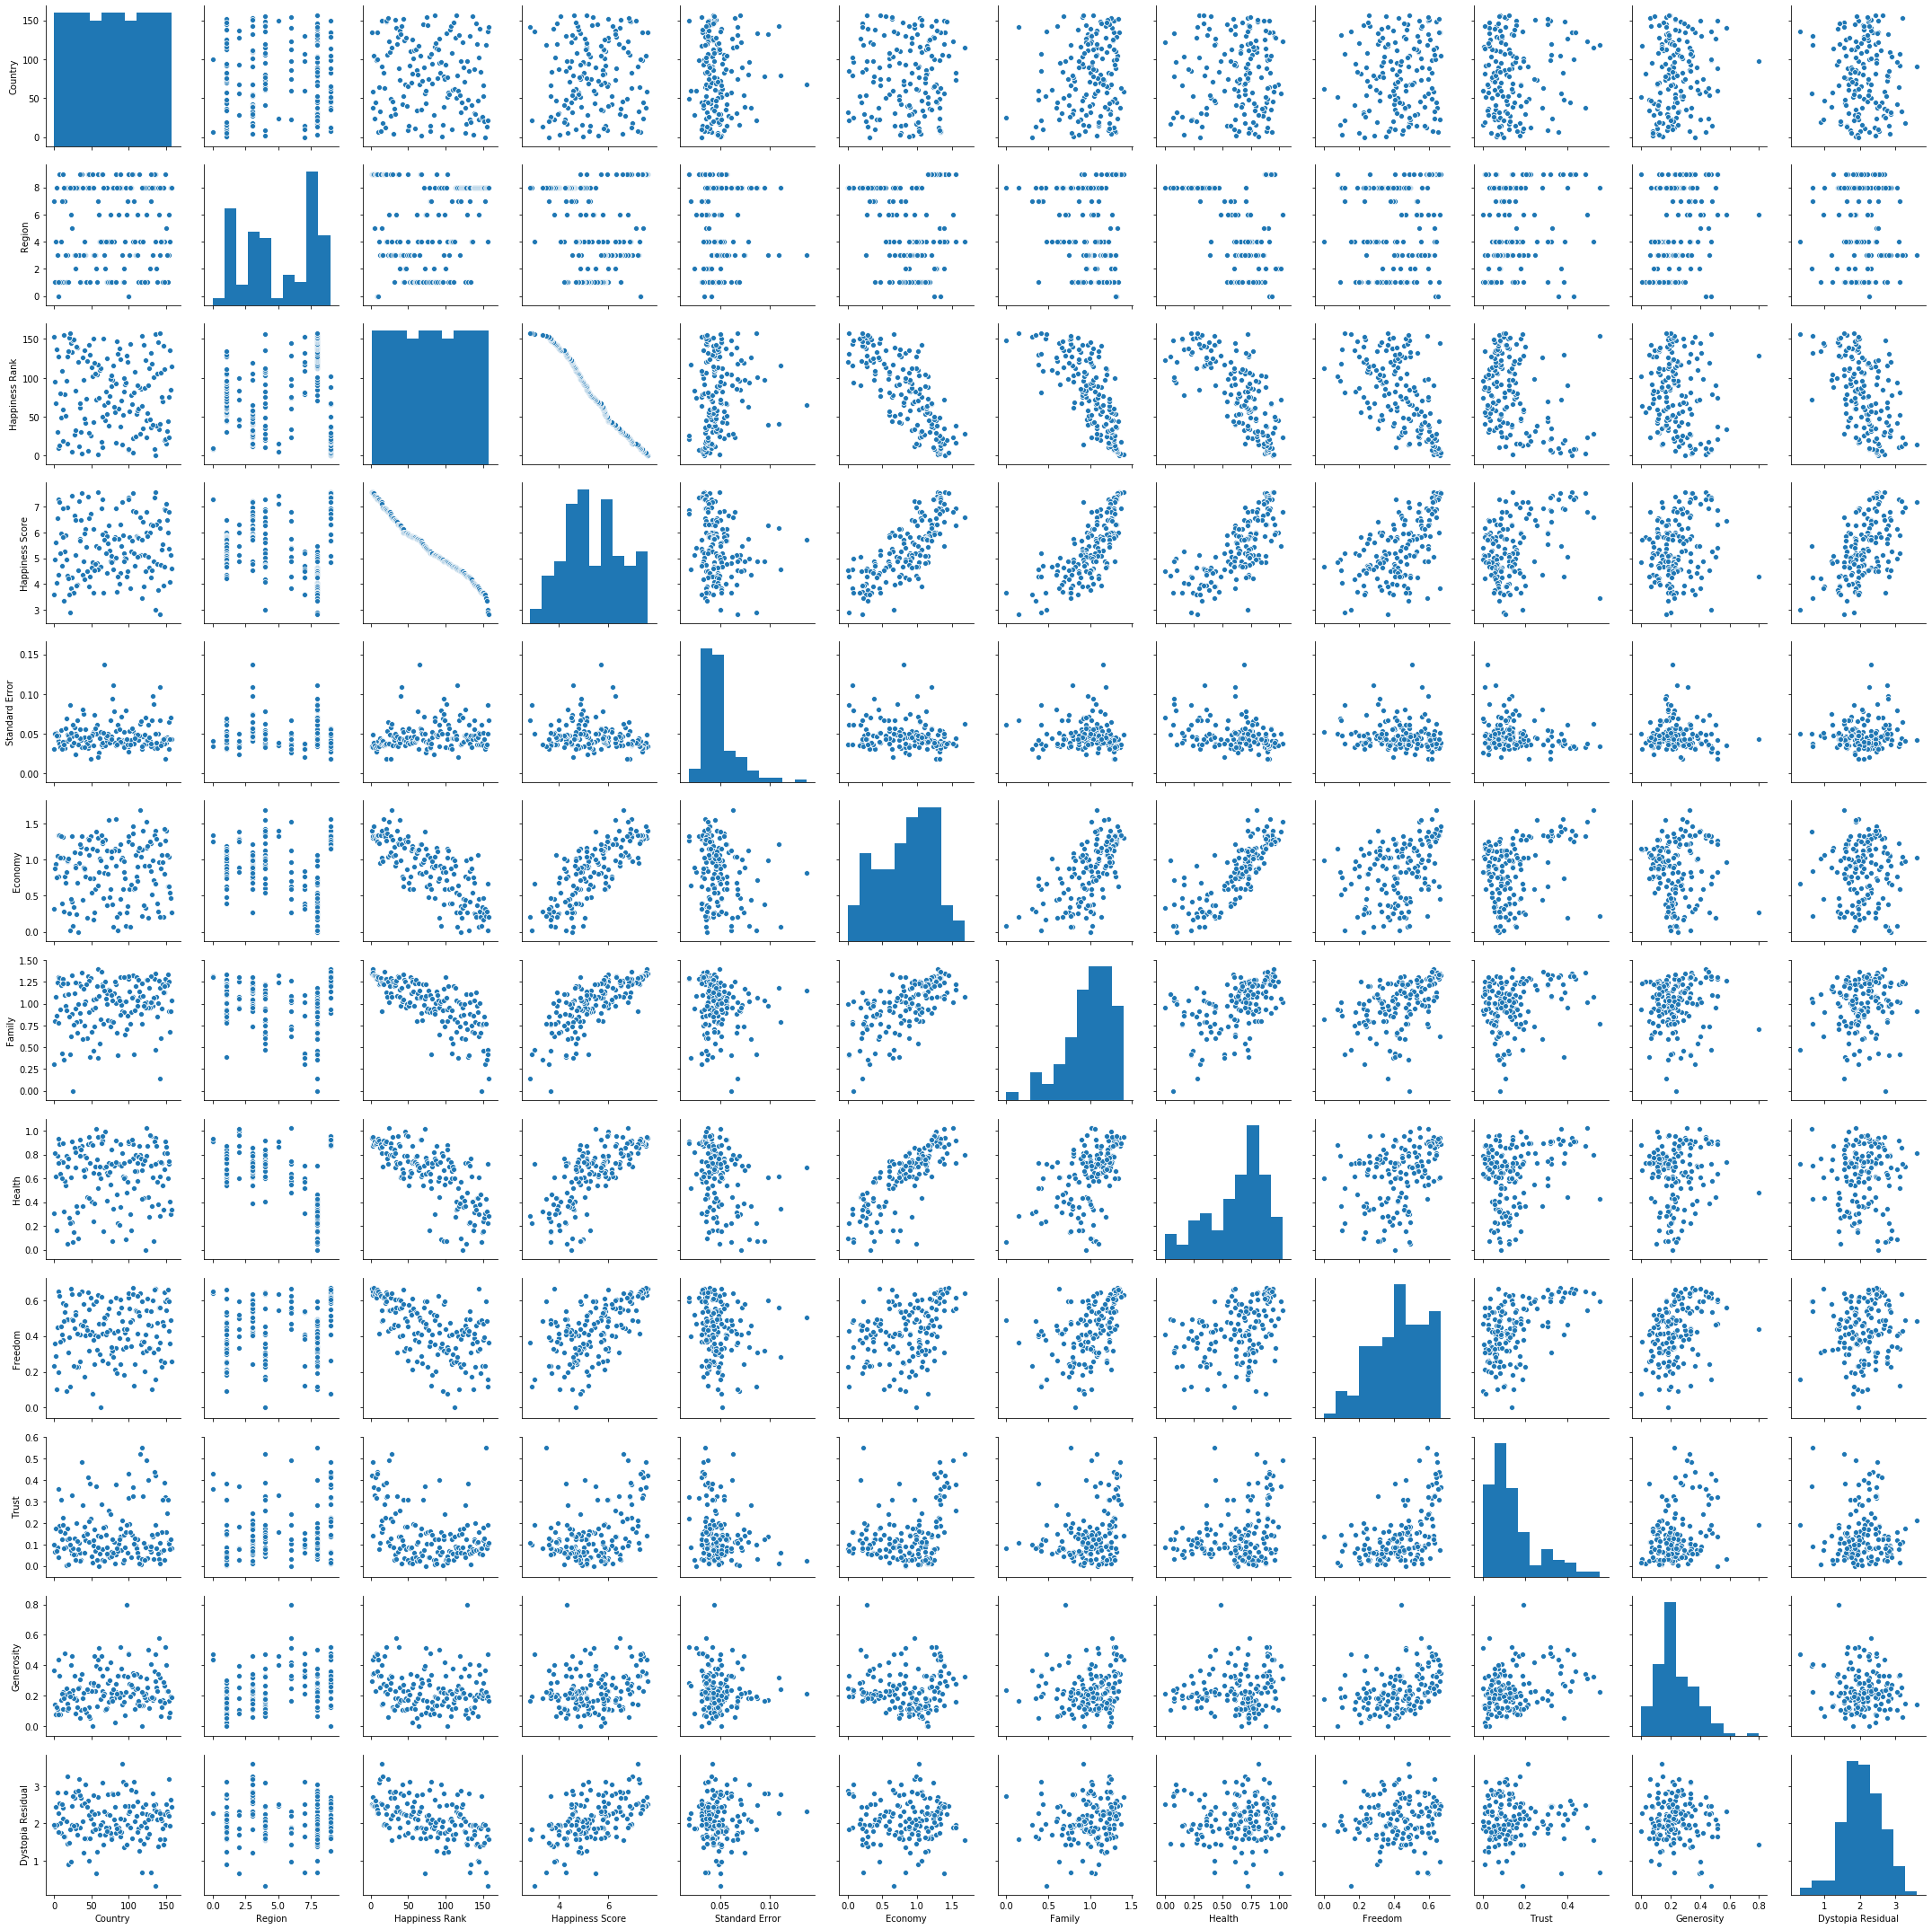

In [38]:
sns.pairplot(df)

Pairplot of given dataset

In [39]:
dfcor=df.corr()
dfcor

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy,0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health,0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust,0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


Correlation between every column of given dataset

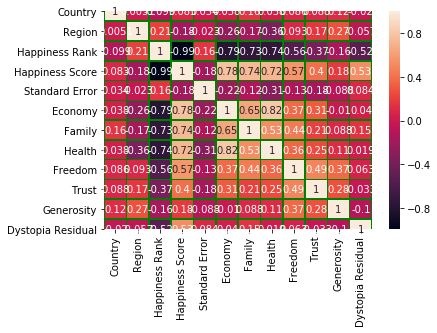

In [40]:
sns.heatmap(dfcor,annot=True,linewidths=0.5,linecolor='green')

Heatmap of dataset

In [41]:
df.skew()

Country              0.000000
Region              -0.116119
Happiness Rank       0.000418
Happiness Score      0.097769
Standard Error       1.983439
Economy             -0.317575
Family              -1.006893
Health              -0.705328
Freedom             -0.413462
Trust                1.385463
Generosity           1.001961
Dystopia Residual   -0.238911
dtype: float64

Skewness of columns

In [42]:
df['Standard Error'].skew()

1.9834393956708811

In [43]:
StandardError_log = np.log(df['Standard Error'])
StandardError_log.skew()

0.4846231847179493

In [44]:
df['Trust'].skew()

1.385462595467315

In [45]:
Trust_log=np.log(df['Trust'])
Trust_log.skew()

nan

In [46]:
from scipy import stats

In [47]:
StandardError_boxcox=stats.boxcox(df['Standard Error'])[0]
pd.Series(StandardError_boxcox).skew()

-0.048029714941153004

In [48]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df_new=df[~((df<(Q1-1.5 * IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

IQR method to remove outliers to reduce the skewness

In [49]:
df_new

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
6,99,9,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
9,6,0,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
10,64,4,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
11,33,3,12,7.226,0.04454,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,3.17728
12,7,9,13,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320
14,150,5,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011
15,18,3,16,6.983,0.04076,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574,3.26001
17,63,9,18,6.940,0.03676,1.33596,1.36948,0.89533,0.61777,0.28703,0.45901,1.97570


In [50]:
print('shape before and after')
print('shape before'.ljust(20),':',df.shape)
print('shape after'.ljust(20),':',df_new.shape)
print('Percentage Loss'.ljust(20),':',(df.shape[0]-df_new.shape[0])/df.shape[0])

shape before and after
shape before         : (158, 12)
shape after          : (126, 12)
Percentage Loss      : 0.20253164556962025


Shape of dataset before and after outliers

In [51]:
df_new.skew()

Country              0.142200
Region               0.027379
Happiness Rank      -0.018211
Happiness Score      0.217857
Standard Error       0.478133
Economy             -0.418441
Family              -0.704866
Health              -0.755316
Freedom             -0.392531
Trust                1.082193
Generosity           0.689359
Dystopia Residual    0.159596
dtype: float64

In [52]:
df.shape

(158, 12)

In [53]:
df_new.shape

(126, 12)

In [54]:
x=df_new.iloc[:,0:-1]
x.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
6,99,9,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610
9,6,0,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562
10,64,4,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172


In [55]:
y=df_new.iloc[:,-1]
y.head()

1     2.70201
4     2.45176
6     2.46570
9     2.26646
10    3.08854
Name: Dystopia Residual, dtype: float64

In [56]:
x.shape

(126, 11)

In [57]:
y.shape

(126,)

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

Creating the test train split for the training and testing the model

In [59]:
x_train.shape

(84, 11)

Data for training the model 84 rows and 11 columns

In [88]:
x_test.shape

(42, 11)

 Data for testing the model 42 rows and 11 columns

In [61]:
y_train.shape

(84,)

Target data for training the model

In [62]:
y_test.shape

(42,)

Target data for testing the model

In [63]:
lm=LinearRegression()

In [64]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
lm.score(x_train,y_train)

0.9999996844873714

In [66]:
lm.coef_

array([ 1.16891206e-06,  1.30539351e-06,  8.33230978e-06,  1.00026096e+00,
       -5.15227352e-04, -1.00003928e+00, -1.00010544e+00, -9.99636630e-01,
       -9.99371475e-01, -1.00018651e+00, -1.00000121e+00])

In [67]:
lm.intercept_

-0.0024311462718107357

In [68]:
lm=LinearRegression()
lm.fit(x_train,y_train)
print('Coefficient:',lm.coef_)
print('Intercept:',lm.intercept_)
lmpred=lm.predict(x_test)
print("Mean_Squared_error:",mean_squared_error(y_test,lmpred))
print('R2_score:',r2_score(y_test,lmpred))

Coefficient: [ 1.16891206e-06  1.30539351e-06  8.33230978e-06  1.00026096e+00
 -5.15227352e-04 -1.00003928e+00 -1.00010544e+00 -9.99636630e-01
 -9.99371475e-01 -1.00018651e+00 -1.00000121e+00]
Intercept: -0.0024311462718107357
Mean_Squared_error: 7.19350485338749e-08
R2_score: 0.999999718696975


In [69]:
ls=Lasso()
ls.fit(x_train,y_train)
print("Coefficient:",ls.coef_)
print("Intercept:",ls.intercept_)
lspred=ls.predict(x_test)
print("Mean_Squared_error:",mean_squared_error(y_test,lspred))
print("R2_score:",r2_score(y_test,lspred))

Coefficient: [ 0.00017969  0.         -0.00610868  0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.        ]
Intercept: 2.60510064519334
Mean_Squared_error: 0.18601820514558087
R2_score: 0.27257317710398576


In [70]:
rd=Ridge()
rd.fit(x_train,y_train)
print('Coefficient:',rd.coef_)
print('Intercept:',rd.intercept_)
rdpred=rd.predict(x_test)
print('Mean_Squared_error:',mean_squared_error(y_test,rdpred))
print('R2_score',r2_score(y_test,rdpred))

Coefficient: [ 1.39515447e-04 -2.65331895e-03 -1.01302695e-02  3.64741972e-01
  9.71234590e-03 -8.20770153e-01 -7.15851378e-01 -6.82664921e-01
 -6.33472641e-01 -2.38791336e-01 -4.36655521e-01]
Intercept: 3.2191449217362513
Mean_Squared_error: 0.023760876389161974
R2_score 0.9070827567255256


In [71]:
eln=ElasticNet()
eln.fit(x_train,y_train)
print('Coefficient:',eln.coef_)
print('Intercept:',eln.intercept_)
elnpred=eln.predict(x_test)
print('Mean_Squared_error:',mean_squared_error(y_test,elnpred))
print('R2_score:',r2_score(y_test,elnpred))

Coefficient: [ 0.00040548  0.         -0.00638156  0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.        ]
Intercept: 2.6103623761842862
Mean_Squared_error: 0.18779239517277008
R2_score: 0.2656351819024839


In [83]:
scr=cross_val_score(eln,x,y,cv=5)
print("Cross validation for ElasticNet:",scr.mean())

Cross validation for ElasticNet: -0.07655751297521989


In [84]:
scr=cross_val_score(rd,x,y,cv=5)
print('Cross validation for Ridge:',scr.mean())

Cross validation for Ridge: 0.891083438260664


In [85]:
scr=cross_val_score(ls,x,y,cv=5)
print('Cross validation for Lasso:',scr.mean())

Cross validation for Lasso: -0.08828548166542168


In [86]:
scr=cross_val_score(lm,x,y,cv=5)
print('Cross validation for LinearRegression:',scr.mean())

Cross validation for LinearRegression: 0.999999425334609


Conclusion : Here LinearRegressionCV Regression model is the best model as R2 score is .999

In [87]:
import joblib
joblib.dump(lm,'lmfile.obj')
lm_from_joblib=joblib.load('lmfile.obj')
lm_from_joblib.predict(x_test)

array([2.45374332, 2.67770641, 0.99850935, 2.63444941, 2.27560815,
       1.21355109, 1.68426385, 1.86967953, 1.87887732, 2.13124094,
       3.08889147, 1.46167031, 2.82349344, 2.866934  , 1.73805449,
       2.83583897, 1.71929859, 2.41445865, 1.58820486, 1.96985164,
       1.86613122, 1.87654444, 2.06385977, 2.70221671, 1.86429594,
       1.61629035, 1.93120948, 2.4749986 , 1.94923423, 1.4650356 ,
       3.0347221 , 1.64843577, 2.75452469, 1.92357101, 1.41718843,
       2.1155967 , 2.24185194, 2.43851088, 2.32379762, 2.00067518,
       1.44430478, 2.24626237])